In [19]:
import sys
sys.path.append('../figures/')

import arviz as az
import jax.numpy as jnp
import matplotlib.pylab as plt
import numpy as np
from scipy.special import erf

from astropy.cosmology import Planck15
import astropy.units as u
from makeCorner import *
import numpyro.distributions as dist

az.rcParams["plot.max_subplots"] = 80
os.environ["HDF5_USE_FILE_LOCKING"] = "FALSE"

logit_std = 2.5
tmp_max = 100.
tmp_min = 2.

In [22]:
cdf_file = "./RUNS/GWB_O3.cdf"
data = az.from_netcdf(cdf_file)
samps = data.posterior.stack(draws=("chain", "draw"))

In [ ]:
az.plot_trace(data_no_GWB, compact=True)
plt.tight_layout()
plt.show()

In [23]:
new_priors = {
    "logR20":dist.Uniform(-2,1),
    "alpha_ref":dist.Normal(-2,3),
    "mu_m1":dist.Uniform(20,50),
    "mMin":dist.Uniform(5,15),
    "bq":dist.Normal(0,3),
    "alpha_z":dist.Normal(0,4),
    "beta_z":dist.Uniform(0,10),
    "zp": dist.Uniform(0,4),
    "fpeak": dist.Uniform(-5,0),
    "log_high_f_peak": dist.Uniform(-5,0),
    "width_f_peak": dist.Uniform(-1,1),
    "middle_z_f_peak": dist.Uniform(0,4),
    "delta_mu": dist.Normal(0, 5),
    "width_mu": dist.Uniform(-1,1),
    "middle_z_mu": dist.Uniform(0,4),
    "sig_m1": dist.Uniform(1.5,15),
    "high_sig": dist.Uniform(1.5,15),
    "width_sig": dist.Uniform(-1,1),
    "middle_z_sig": dist.Uniform(0,4),
}

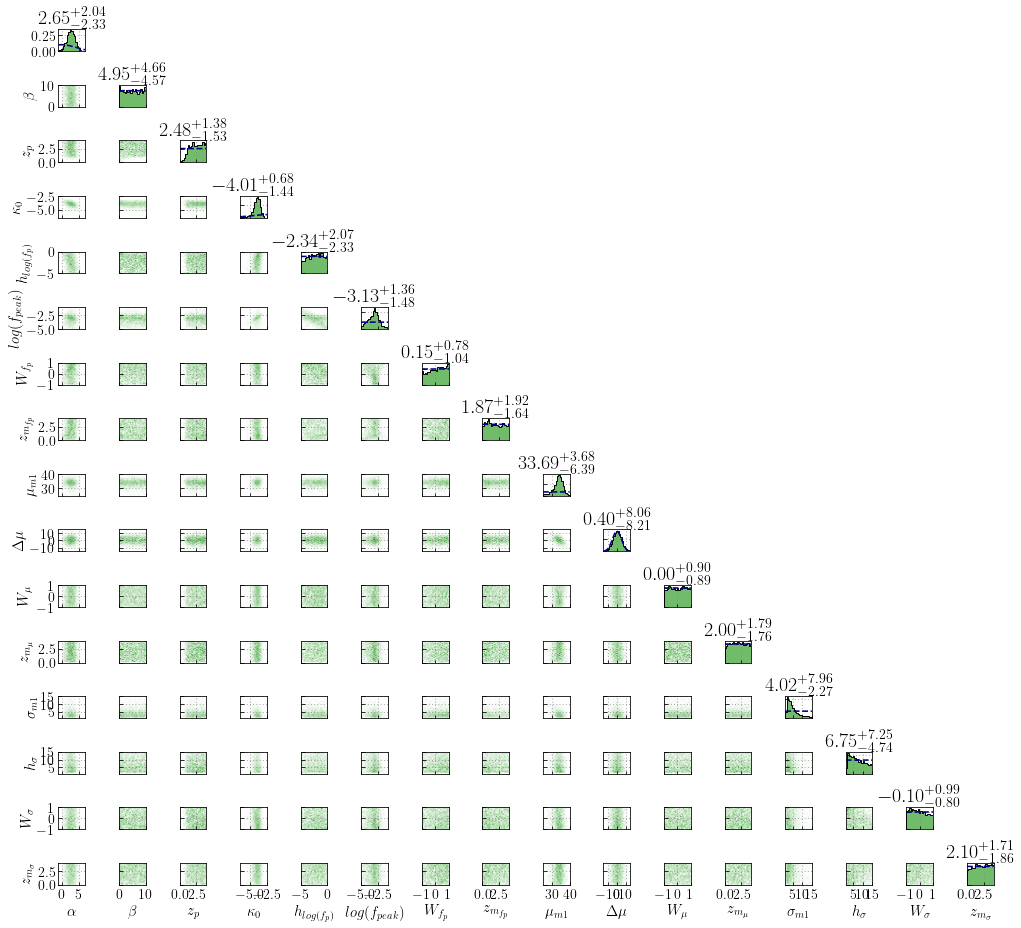

In [24]:
fig = plt.figure(figsize=(14,13))

stacked_samples_no_GWB = data_no_GWB.posterior.stack(draws=("chain", "draw"))
toPlot_no_GWB = {
    "alpha_z":{"data":stacked_samples_no_GWB.alpha_z,"plot_bounds":(-1,7),"label":r"$\alpha$"},
    "beta_z":{"data":stacked_samples_no_GWB.beta_z,"plot_bounds":(0,10),"label":r"$\beta$"},
    "zp":{"data":stacked_samples_no_GWB.zp,"plot_bounds":(0,4),"label":r"$z_p$"},
    "alpha_ref":{"data":stacked_samples_no_GWB.alpha_ref,"plot_bounds":(-6.5,-2.5),"label":r"$\kappa_{0}$"},
    "log_high_f_peak":{"data":stacked_samples_no_GWB.log_high_f_peak,"plot_bounds":(-5,0),"label":r"$h_{log(f_{p})}$"},
    "fpeak":{"data":stacked_samples_no_GWB.log_f_peak,"plot_bounds":(-5,-1),"label":r"$log(f_{peak})$"},
    "width_f_peak":{"data":stacked_samples_no_GWB.log_width_f_peak,"plot_bounds":(-1,1),"label":r"$W_{f_p}$"},
    "middle_z_f_peak":{"data":stacked_samples_no_GWB.middle_z_f_peak,"plot_bounds":(0,4),"label":r"$z_{m_{f_p}}$"},
    "mu_m1":{"data":stacked_samples_no_GWB.mu_m1,"plot_bounds":(25,40),"label":r"$\mu_{m1}$"},
    "delta_mu":{"data":stacked_samples_no_GWB.delta_mu,"plot_bounds":(-15,15),"label":r"$\Delta \mu$"},
    "width_mu":{"data":stacked_samples_no_GWB.log_width_mu,"plot_bounds":(-1,1),"label":r"$W_\mu$"},
    "middle_z_mu":{"data":stacked_samples_no_GWB.middle_z_mu,"plot_bounds":(0,4),"label":r"$z_{m_\mu}$"},
    "sig_m1":{"data":stacked_samples_no_GWB.sig_m1,"plot_bounds":(1,15),"label":r"$\sigma_{m1}$"},
    "high_sig":{"data":stacked_samples_no_GWB.high_sig,"plot_bounds":(1,15),"label":r"$h_{\sigma}$"},
    "width_sig":{"data":stacked_samples_no_GWB.log_width_sig,"plot_bounds":(-1,1),"label":r"$W_{\sigma}$"},
    "middle_z_sig":{"data":stacked_samples_no_GWB.middle_z_sig,"plot_bounds":(0,4),"label":r"$z_{m_\sigma}$"},
}

plot_corner(fig,toPlot_no_GWB,'#33a02c',labelsize=15, priors = new_priors)
plt.savefig("HDPosterior_together_all.png", dpi=500, bbox_inches='tight')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()
plt.show()

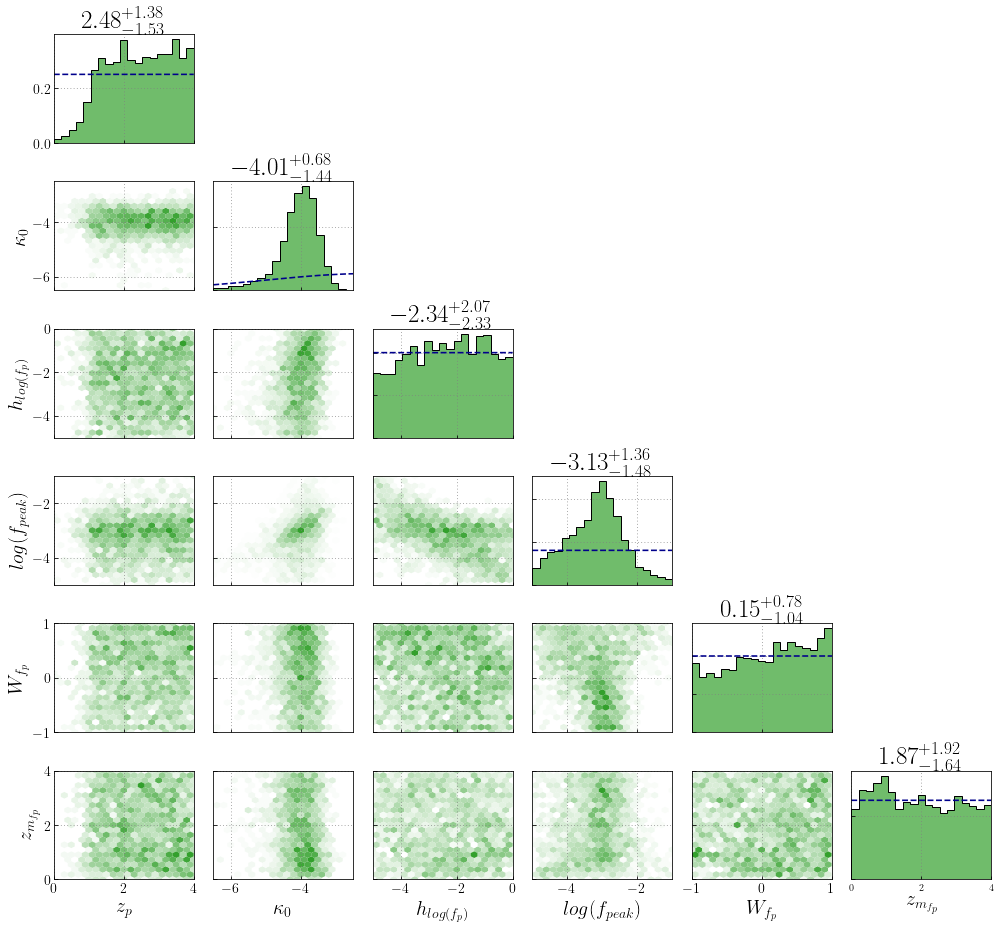

In [25]:
fig = plt.figure(figsize=(14,13))

toPlot_no_GWB_f_peak= {
    "zp":{"data":stacked_samples_no_GWB.zp,"plot_bounds":(0,4),"label":r"$z_p$"},
    "alpha_ref":{"data":stacked_samples_no_GWB.alpha_ref,"plot_bounds":(-6.5,-2.5),"label":r"$\kappa_{0}$"},
    "log_high_f_peak":{"data":stacked_samples_no_GWB.log_high_f_peak,"plot_bounds":(-5,0),"label":r"$h_{log(f_{p})}$"},
    "fpeak":{"data":stacked_samples_no_GWB.log_f_peak,"plot_bounds":(-5,-1),"label":r"$log(f_{peak})$"},
    "width_f_peak":{"data":stacked_samples_no_GWB.log_width_f_peak,"plot_bounds":(-1,1),"label":r"$W_{f_p}$"},
    "middle_z_f_peak":{"data":stacked_samples_no_GWB.middle_z_f_peak,"plot_bounds":(0,4),"label":r"$z_{m_{f_p}}$"},
}

plot_corner(fig, toPlot_no_GWB_f_peak, "#33a02c", labelsize=20, priors = new_priors)
plt.savefig("PE_O3_CBC_fp_parameters.png", dpi=400, bbox_inches='tight')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

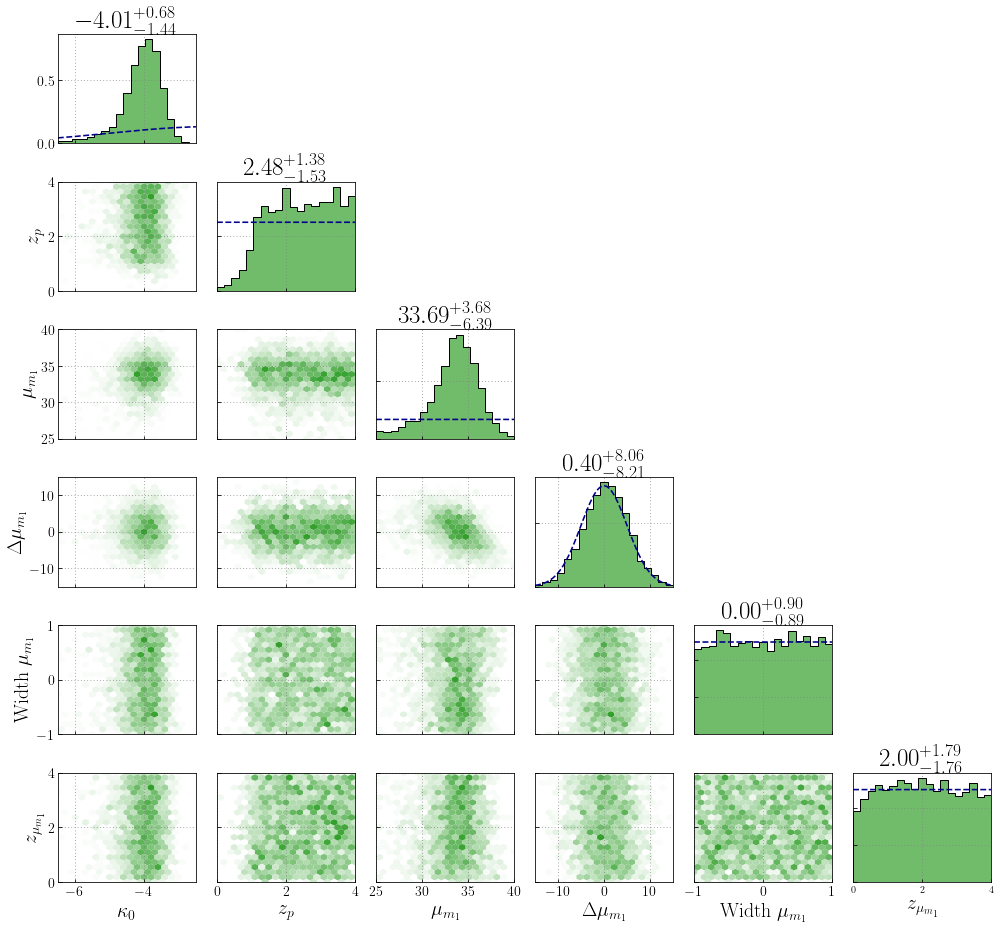

In [26]:
fig = plt.figure(figsize=(14,13))
toPlot_no_GWB_mu = {
    "alpha_ref":{"data":stacked_samples_no_GWB.alpha_ref,"plot_bounds":(-6.5,-2.5),"label":r"$\kappa_{0}$"},
    "zp":{"data":stacked_samples_no_GWB.zp,"plot_bounds":(0,4),"label":r"$z_p$"},
    "mu_m1":{"data":stacked_samples_no_GWB.mu_m1,"plot_bounds":(25,40),"label":r"$\mu_{m_1}$"},
    "delta_mu":{"data":stacked_samples_no_GWB.delta_mu,"plot_bounds":(-15,15),"label":r"$\Delta \mu_{m_1}$"},
    "width_mu":{"data":stacked_samples_no_GWB.log_width_mu,"plot_bounds":(-1,1),"label":r"Width $\mu_{m_1}$"},
    "middle_z_mu":{"data":stacked_samples_no_GWB.middle_z_mu,"plot_bounds":(0,4),"label":r"$z_{\mu_{m_1}}$"},
}
plot_corner(fig, toPlot_no_GWB_mu, "#33a02c", labelsize=20, priors = new_priors)
plt.savefig("PE_O3_CBC_fp_parameters.png", dpi=400, bbox_inches='tight')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

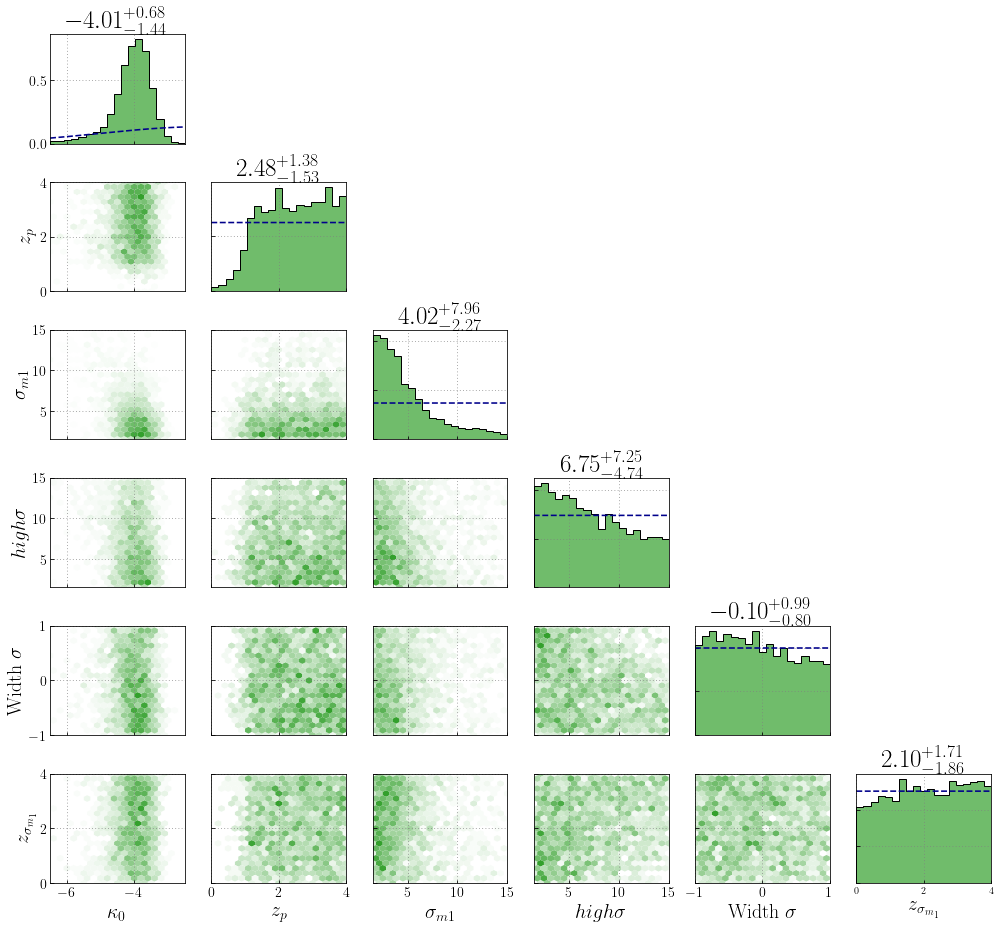

In [27]:
fig = plt.figure(figsize=(14,13))
toPlot_no_GWB_sig = {
    "alpha_ref":{"data":stacked_samples_no_GWB.alpha_ref,"plot_bounds":(-6.5,-2.5),"label":r"$\kappa_{0}$"},
    "zp":{"data":stacked_samples_no_GWB.zp,"plot_bounds":(0,4),"label":r"$z_p$"},
    "sig_m1":{"data":stacked_samples_no_GWB.sig_m1,"plot_bounds":(1.5,15),"label":r"$\sigma_{m1}$"},
    "high_sig":{"data":stacked_samples_no_GWB.high_sig,"plot_bounds":(1.5,15),"label":r"$high \sigma$"},
    "width_sig":{"data":stacked_samples_no_GWB.log_width_sig,"plot_bounds":(-1,1),"label":r"Width $\sigma$"},
    "middle_z_sig":{"data":stacked_samples_no_GWB.middle_z_sig,"plot_bounds":(0,4),"label":r"$z_{\sigma_{m_1}}$"},
}
plot_corner(fig, toPlot_no_GWB_sig, "#33a02c", labelsize=20, priors = new_priors)
plt.savefig("PE_O3_CBC_fp_parameters.png", dpi=400, bbox_inches='tight')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [28]:
def sigmoid(low, delta, width, middle, zs):
    return delta / (1 + jnp.exp(-(1/width)*(zs - middle))) + low

In [29]:
def sigmoid_no_delta(low, high, width, middle, zs):
    return (high - low) / (1 + jnp.exp(-(1/width)*(zs - middle))) + low

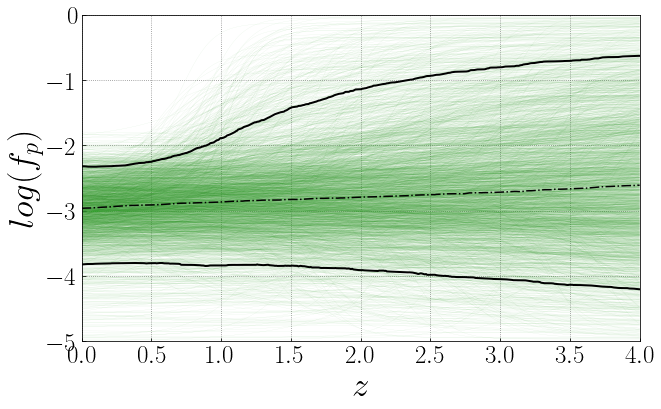

In [30]:
zs = np.linspace(0,4,500)
fig,ax = plt.subplots(figsize=(10,6))
mergerrate_matrix = np.zeros((len(range(stacked_samples_no_GWB.log_f_peak.size)), len(zs)))
for i in range(samps_no_gwb.log_f_peak.size):
    f_peak_r = sigmoid_no_delta(samps_no_gwb.log_f_peak.values[i],
                               samps_no_gwb.log_high_f_peak.values[i],
                               10.**samps_no_gwb.log_width_f_peak.values[i],
                               samps_no_gwb.middle_z_f_peak.values[i],
                               zs,
                              )
    plt.plot(zs, f_peak_r, lw = 0.15, color='#33a02c', alpha = 0.2)
    mergerrate_matrix[i, :] = f_peak_r

mean_merger = np.median(mergerrate_matrix, axis = 0)
plt.xlim(0,4)
plt.ylim(-5, 0)
ax.set_xlabel(r"$z$", fontsize = 35)
ax.set_ylabel(r"$log(f_p)$", fontsize = 35)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.plot(zs, mean_merger, "-.", c="k", rasterized=True)
plt.plot(zs,np.quantile(mergerrate_matrix,0.05,axis=0), rasterized=True, color='k', lw=2, alpha=1)
plt.plot(zs,np.quantile(mergerrate_matrix,0.95,axis=0), rasterized=True, color='k', lw=2, alpha=1)

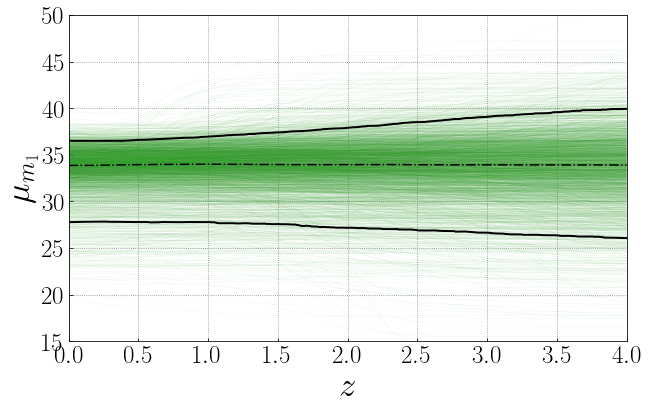

In [31]:
zs = np.linspace(0,4,500)
fig,ax = plt.subplots(figsize=(10,6))
mergerrate_matrix = np.zeros((len(range(stacked_samples_no_GWB.mu_m1.size)), len(zs)))
for i in range(samps_no_gwb.mu_m1.size):
    mu_r = sigmoid(samps_no_gwb.mu_m1.values[i],
                               samps_no_gwb.delta_mu.values[i],
                               10.**samps_no_gwb.log_width_mu.values[i],
                               samps_no_gwb.middle_z_mu.values[i],
                               zs,
                              )
    plt.plot(zs, mu_r, lw = 0.15, color='#33a02c', alpha = 0.2)
    mergerrate_matrix[i, :] = mu_r

mean_merger = np.median(mergerrate_matrix, axis = 0)
plt.xlim(0,4)
plt.ylim(15, 50)
ax.set_xlabel(r"$z$", fontsize = 35)
ax.set_ylabel(r"$\mu_{m_1}$", fontsize = 35)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.plot(zs, mean_merger, "-.", c="k", rasterized=True)
plt.plot(zs,np.quantile(mergerrate_matrix,0.05,axis=0), rasterized=True, color='k', lw=2, alpha=1)
plt.plot(zs,np.quantile(mergerrate_matrix,0.95,axis=0), rasterized=True, color='k', lw=2, alpha=1)

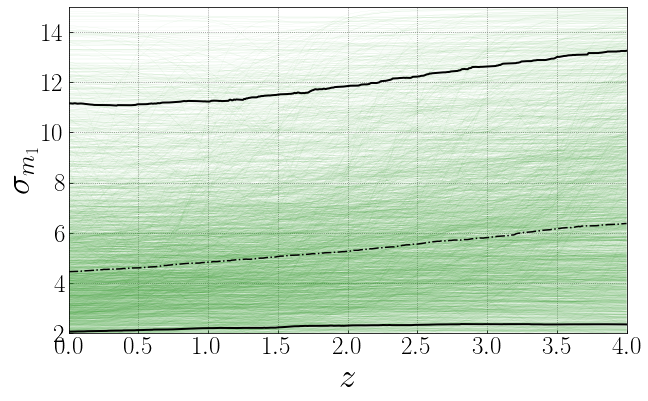

In [32]:
zs = np.linspace(0,4,500)
fig,ax = plt.subplots(figsize=(10,6))
mergerrate_matrix = np.zeros((len(range(stacked_samples_no_GWB.sig_m1.size)), len(zs)))
for i in range(samps_no_gwb.sig_m1.size):
    sig_r = sigmoid_no_delta(samps_no_gwb.sig_m1.values[i],
                               samps_no_gwb.high_sig.values[i],
                               10.**samps_no_gwb.log_width_sig.values[i],
                               samps_no_gwb.middle_z_sig.values[i],
                               zs,
                              )
    plt.plot(zs, sig_r, lw = 0.15, color='#33a02c', alpha = 0.2)
    mergerrate_matrix[i, :] = sig_r

mean_merger = np.median(mergerrate_matrix, axis = 0)
plt.xlim(0,4)
plt.ylim(2,15)
ax.set_xlabel(r"$z$", fontsize = 35)
ax.set_ylabel(r"$\sigma_{m_1}$", fontsize = 35)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.plot(zs, mean_merger, "-.", c="k", rasterized=True)
plt.plot(zs,np.quantile(mergerrate_matrix,0.05,axis=0), rasterized=True, color='k', lw=2, alpha=1)
plt.plot(zs,np.quantile(mergerrate_matrix,0.95,axis=0), rasterized=True, color='k', lw=2, alpha=1)

In [33]:
def massModel_variation_all_m1(m1, alpha_ref, mu_m1, delta_mu, width_mu, middle_mu, 
                               sig_m1, high_sig, width_sig, middle_sig, 
                               log_f_peak, log_high_f_peak, width_f_peak, middle_f_peak, mMax, mMin, dmMax, dmMin, zs):
    
    p_m1_pl = (1.+alpha_ref)*m1**(alpha_ref)/(tmp_max**(1.+alpha_ref) - tmp_min**(1.+alpha_ref))

    new_mu_m1 = sigmoid(mu_m1, delta_mu, width_mu, middle_mu, zs)
    new_sig_m1 = sigmoid_no_delta(sig_m1, high_sig, width_sig, middle_sig, zs)

    p_m1_peak = jnp.exp(-(m1-new_mu_m1)**2/(2.*new_sig_m1**2))/jnp.sqrt(2.*np.pi*new_sig_m1**2)

    # Compute low- and high-mass filters
    low_filter = jnp.exp(-(m1-mMin)**2/(2.*dmMin**2))
    low_filter = jnp.where(m1<mMin,low_filter,1.)
    high_filter = jnp.exp(-(m1-mMax)**2/(2.*dmMax**2))
    high_filter = jnp.where(m1>mMax,high_filter,1.)

    new_f_peak = sigmoid_no_delta(log_f_peak, log_high_f_peak, width_f_peak, middle_f_peak, zs) 
    actual_f_peak = 10.**(new_f_peak)
    combined_p = jnp.array((actual_f_peak*p_m1_peak + (1. - actual_f_peak)*p_m1_pl)*low_filter*high_filter)
    return combined_p 

In [34]:
def merger_rate_z(z, alpha, beta, zp):
    return (1+z)**alpha/(1+((1+z)/(1+zp))**(alpha+beta))

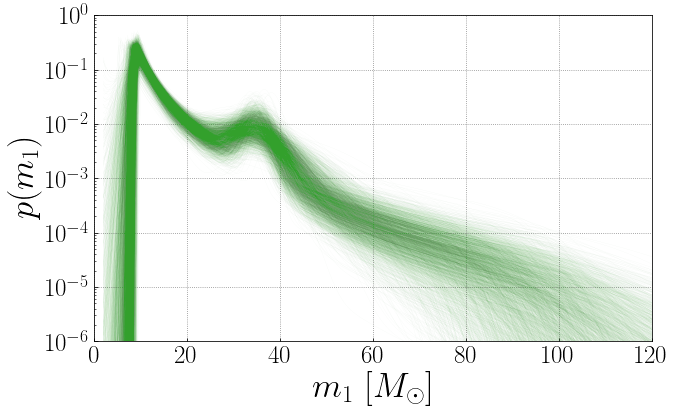

In [35]:
fig,ax = plt.subplots(figsize=(10,6))
m_grid = np.linspace(2,120,500)

for i in range(samps_no_gwb.alpha_ref.size):
    p_m = massModel_variation_all_m1(m_grid,samps_no_gwb.alpha_ref.values[i],
                                     samps_no_gwb.mu_m1.values[i], samps_no_gwb.delta_mu.values[i], samps_no_gwb.width_mu.values[i], samps_no_gwb.middle_z_mu.values[i],
                                     samps_no_gwb.sig_m1.values[i],samps_no_gwb.high_sig.values[i], samps_no_gwb.width_sig.values[i], samps_no_gwb.middle_z_sig.values[i],
                                     samps_no_gwb.log_f_peak.values[i],samps_no_gwb.log_high_f_peak.values[i], samps_no_gwb.width_f_peak.values[i], samps_no_gwb.middle_z_f_peak.values[i],
                                     samps_no_gwb.mMax.values[i], samps_no_gwb.mMin.values[i],
                    10.**samps_no_gwb.log_dmMax.values[i],10.**samps_no_gwb.log_dmMin.values[i], np.array([0.2]))
    p_m /= np.trapz(p_m,m_grid)
    ax.plot(m_grid,p_m,color='#33a02c',lw=0.1,alpha=0.1, rasterized = True)
    
ax.set_yscale('log')
ax.set_xlim(0,120)
ax.set_ylim(1e-6,1)
ax.set_xlabel(r"$m_1$ [$M_{\odot}$]", fontsize = 35)
ax.set_ylabel(r"$p(m_1)$", fontsize = 35)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.savefig("p(m)_z_0.2_GWBadded.png", dpi=200, bbox_inches='tight')

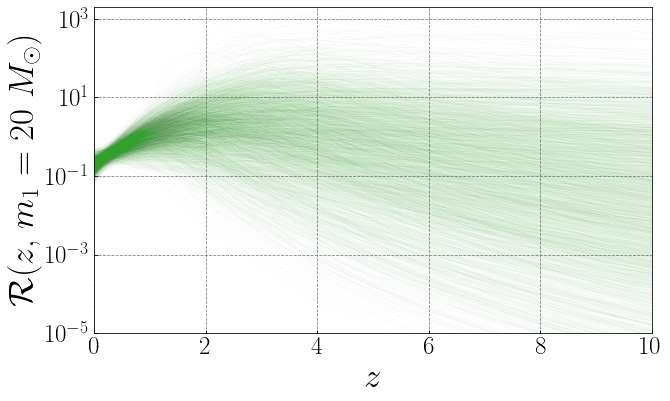

In [36]:
fig,ax = plt.subplots(figsize=(10,6))
z_grid = np.linspace(0,10,500)
for i in range(samps_no_gwb.alpha_ref.size):    
    p_z = massModel_variation_all_m1(20,samps_no_gwb.alpha_ref.values[i],
                                     samps_no_gwb.mu_m1.values[i], samps_no_gwb.delta_mu.values[i], samps_no_gwb.width_mu.values[i], samps_no_gwb.middle_z_mu.values[i],
                                     samps_no_gwb.sig_m1.values[i],samps_no_gwb.high_sig.values[i], samps_no_gwb.width_sig.values[i], samps_no_gwb.middle_z_sig.values[i],
                                     samps_no_gwb.log_f_peak.values[i],samps_no_gwb.log_high_f_peak.values[i], samps_no_gwb.width_f_peak.values[i], samps_no_gwb.middle_z_f_peak.values[i],
                                     samps_no_gwb.mMax.values[i], samps_no_gwb.mMin.values[i],
                    10.**samps_no_gwb.log_dmMax.values[i],10.**samps_no_gwb.log_dmMin.values[i], z_grid)
    p_z *= merger_rate_z(z_grid, samps_no_gwb.alpha_z.values[i], samps_no_gwb.beta_z.values[i], samps_no_gwb.zp.values[i])
    p_z /= merger_rate_z(0.2, samps_no_gwb.alpha_z.values[i], samps_no_gwb.beta_z.values[i], samps_no_gwb.zp.values[i])
    p_20 = massModel_variation_all_m1(20,samps_no_gwb.alpha_ref.values[i],
                                     samps_no_gwb.mu_m1.values[i], samps_no_gwb.delta_mu.values[i], samps_no_gwb.width_mu.values[i], samps_no_gwb.middle_z_mu.values[i],
                                     samps_no_gwb.sig_m1.values[i],samps_no_gwb.high_sig.values[i], samps_no_gwb.width_sig.values[i], samps_no_gwb.middle_z_sig.values[i],
                                     samps_no_gwb.log_f_peak.values[i],samps_no_gwb.log_high_f_peak.values[i], samps_no_gwb.width_f_peak.values[i], samps_no_gwb.middle_z_f_peak.values[i],
                                     samps_no_gwb.mMax.values[i], samps_no_gwb.mMin.values[i],
                    10.**samps_no_gwb.log_dmMax.values[i],10.**samps_no_gwb.log_dmMin.values[i], np.array([0.2]))
    p_z *= samps_no_gwb.R20.values[i]/p_20 # overall factor of evolving R
    ax.plot(z_grid,p_z,color='#33a02c',lw=0.1,alpha=0.1, rasterized = True)

ax.set_yscale('log')
ax.set_ylim(1e-5,2e3)
ax.set_xlim(0,10)
ax.set_xlabel(r"$z$", fontsize=35)
ax.set_ylabel(r"$\mathcal{R}$($z$, $m_1$ = 20 $M_{\odot}$)", fontsize=35)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.grid(visible=True, which='major', axis='both',linestyle='--')
plt.grid(visible=True, which='minor', axis='both',linewidth=0.5) 
plt.show()

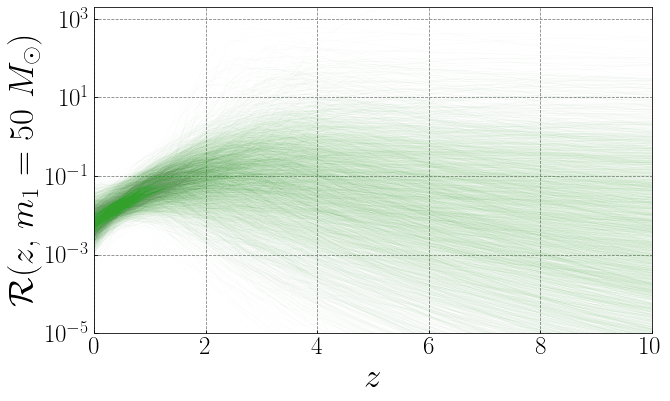

In [37]:
fig,ax = plt.subplots(figsize=(10,6))
z_grid = np.linspace(0,10,500)
M = 50 
for i in range(samps_no_gwb.alpha_ref.size):    
    p_z = massModel_variation_all_m1(M,samps_no_gwb.alpha_ref.values[i],
                                     samps_no_gwb.mu_m1.values[i], samps_no_gwb.delta_mu.values[i], samps_no_gwb.width_mu.values[i], samps_no_gwb.middle_z_mu.values[i],
                                     samps_no_gwb.sig_m1.values[i],samps_no_gwb.high_sig.values[i], samps_no_gwb.width_sig.values[i], samps_no_gwb.middle_z_sig.values[i],
                                     samps_no_gwb.log_f_peak.values[i],samps_no_gwb.log_high_f_peak.values[i], samps_no_gwb.width_f_peak.values[i], samps_no_gwb.middle_z_f_peak.values[i],
                                     samps_no_gwb.mMax.values[i], samps_no_gwb.mMin.values[i],
                    10.**samps_no_gwb.log_dmMax.values[i],10.**samps_no_gwb.log_dmMin.values[i], z_grid)
    p_z *= merger_rate_z(z_grid, samps_no_gwb.alpha_z.values[i], samps_no_gwb.beta_z.values[i], samps_no_gwb.zp.values[i])
    p_z /= merger_rate_z(0.2, samps_no_gwb.alpha_z.values[i], samps_no_gwb.beta_z.values[i], samps_no_gwb.zp.values[i])
    p_20 = massModel_variation_all_m1(20,samps_no_gwb.alpha_ref.values[i],
                                     samps_no_gwb.mu_m1.values[i], samps_no_gwb.delta_mu.values[i], samps_no_gwb.width_mu.values[i], samps_no_gwb.middle_z_mu.values[i],
                                     samps_no_gwb.sig_m1.values[i],samps_no_gwb.high_sig.values[i], samps_no_gwb.width_sig.values[i], samps_no_gwb.middle_z_sig.values[i],
                                     samps_no_gwb.log_f_peak.values[i],samps_no_gwb.log_high_f_peak.values[i], samps_no_gwb.width_f_peak.values[i], samps_no_gwb.middle_z_f_peak.values[i],
                                     samps_no_gwb.mMax.values[i], samps_no_gwb.mMin.values[i],
                    10.**samps_no_gwb.log_dmMax.values[i],10.**samps_no_gwb.log_dmMin.values[i], np.array([0.2]))
    p_z *= samps_no_gwb.R20.values[i]/p_20
    ax.plot(z_grid,p_z,color='#33a02c',lw=0.1,alpha=0.1, rasterized = True)

ax.set_yscale('log')
ax.set_ylim(1e-5,2e3)
ax.set_xlim(0,10)
ax.set_xlabel(r"$z$", fontsize=35)
ax.set_ylabel(r"$\mathcal{R}$($z$, $m_1$ = 50 $M_{\odot}$)", fontsize=35)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.grid(visible=True, which='major', axis='both',linestyle='--')
plt.grid(visible=True, which='minor', axis='both',linewidth=0.5) 
plt.show()

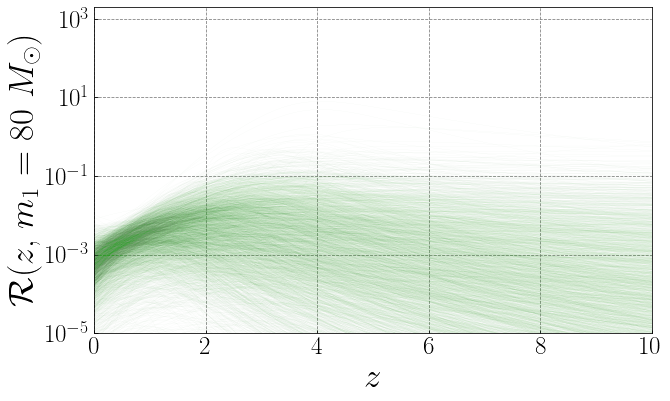

In [38]:
fig,ax = plt.subplots(figsize=(10,6))
z_grid = np.linspace(0,10,500)
M = 80 
for i in range(samps_no_gwb.alpha_ref.size):    
    p_z = massModel_variation_all_m1(M,samps_no_gwb.alpha_ref.values[i],
                                     samps_no_gwb.mu_m1.values[i], samps_no_gwb.delta_mu.values[i], samps_no_gwb.width_mu.values[i], samps_no_gwb.middle_z_mu.values[i],
                                     samps_no_gwb.sig_m1.values[i],samps_no_gwb.high_sig.values[i], samps_no_gwb.width_sig.values[i], samps_no_gwb.middle_z_sig.values[i],
                                     samps_no_gwb.log_f_peak.values[i],samps_no_gwb.log_high_f_peak.values[i], samps_no_gwb.width_f_peak.values[i], samps_no_gwb.middle_z_f_peak.values[i],
                                     samps_no_gwb.mMax.values[i], samps_no_gwb.mMin.values[i],
                    10.**samps_no_gwb.log_dmMax.values[i],10.**samps_no_gwb.log_dmMin.values[i], z_grid)
    p_z *= merger_rate_z(z_grid, samps_no_gwb.alpha_z.values[i], samps_no_gwb.beta_z.values[i], samps_no_gwb.zp.values[i])
    p_z /= merger_rate_z(0.2, samps_no_gwb.alpha_z.values[i], samps_no_gwb.beta_z.values[i], samps_no_gwb.zp.values[i])
    p_20 = massModel_variation_all_m1(20,samps_no_gwb.alpha_ref.values[i],
                                     samps_no_gwb.mu_m1.values[i], samps_no_gwb.delta_mu.values[i], samps_no_gwb.width_mu.values[i], samps_no_gwb.middle_z_mu.values[i],
                                     samps_no_gwb.sig_m1.values[i],samps_no_gwb.high_sig.values[i], samps_no_gwb.width_sig.values[i], samps_no_gwb.middle_z_sig.values[i],
                                     samps_no_gwb.log_f_peak.values[i],samps_no_gwb.log_high_f_peak.values[i], samps_no_gwb.width_f_peak.values[i], samps_no_gwb.middle_z_f_peak.values[i],
                                     samps_no_gwb.mMax.values[i], samps_no_gwb.mMin.values[i],
                    10.**samps_no_gwb.log_dmMax.values[i],10.**samps_no_gwb.log_dmMin.values[i], np.array([0.2]))
    p_z *= samps_no_gwb.R20.values[i]/p_20
    ax.plot(z_grid,p_z,color='#33a02c',lw=0.1,alpha=0.1, rasterized = True)

ax.set_yscale('log')
ax.set_ylim(1e-5,2e3)
ax.set_xlim(0,10)
ax.set_xlabel(r"$z$", fontsize=35)
ax.set_ylabel(r"$\mathcal{R}$($z$, $m_1$ = 80 $M_{\odot}$)", fontsize=35)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.grid(visible=True, which='major', axis='both',linestyle='--')
plt.grid(visible=True, which='minor', axis='both',linewidth=0.5) 
plt.show()

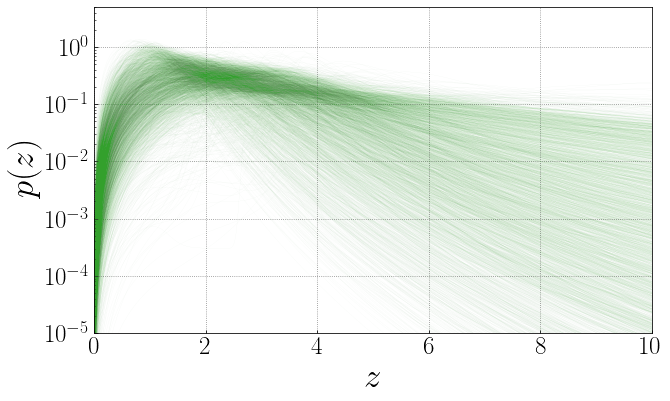

In [41]:
fig,ax = plt.subplots(figsize=(10,6))
z_grid = np.linspace(0,10,500)
for i in range(stacked_samples_no_GWB.alpha_ref.size):    
    p_z_no_gwb =  massModel_variation_all_m1(20,samps_no_gwb.alpha_ref.values[i],
                                     samps_no_gwb.mu_m1.values[i], samps_no_gwb.delta_mu.values[i], samps_no_gwb.width_mu.values[i], samps_no_gwb.middle_z_mu.values[i],
                                     samps_no_gwb.sig_m1.values[i],samps_no_gwb.high_sig.values[i], samps_no_gwb.width_sig.values[i], samps_no_gwb.middle_z_sig.values[i],
                                     samps_no_gwb.log_f_peak.values[i],samps_no_gwb.log_high_f_peak.values[i], samps_no_gwb.width_f_peak.values[i], samps_no_gwb.middle_z_f_peak.values[i],
                                     samps_no_gwb.mMax.values[i], samps_no_gwb.mMin.values[i],
                    10.**samps_no_gwb.log_dmMax.values[i],10.**samps_no_gwb.log_dmMin.values[i], z_grid)
    p_z_no_gwb *= merger_rate_z(z_grid, stacked_samples_no_GWB.alpha_z.values[i], stacked_samples_no_GWB.beta_z.values[i], stacked_samples_no_GWB.zp.values[i])
    # see code in MM
    p_z_no_gwb *= 1/(1+z_grid) # Factor to go from source frame to detector frame
    p_z_no_gwb *= 4.*np.pi*Planck15.differential_comoving_volume(z_grid).to(u.Gpc**3/u.sr).value # to go from per Volume to per z
    p_z_no_gwb /= np.trapz(p_z_no_gwb,z_grid) 
    ax.plot(z_grid,p_z_no_gwb,color='#33a02c',lw=0.1,alpha=0.1, rasterized = True)

    ax.set_yscale('log')
ax.set_xlim(0,10)
ax.set_ylim(1e-5,5)
ax.set_xlabel(r"$z$", fontsize=35)
ax.set_ylabel(r"$p(z)$", fontsize=35)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.savefig("p(z)_m_20_GWBadded_and_noGWB.png", dpi=200, bbox_inches='tight')
plt.show()

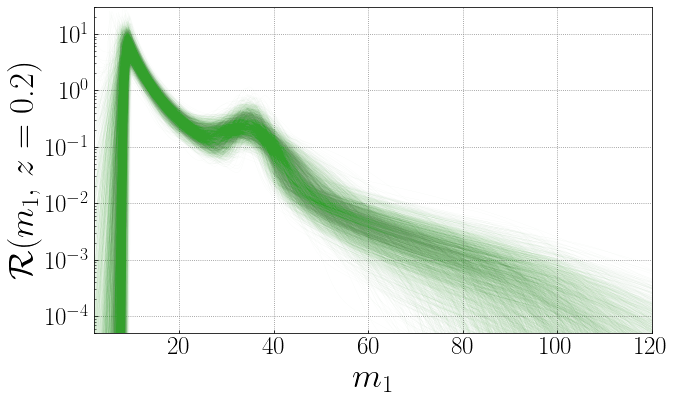

In [42]:
fig,ax = plt.subplots(figsize=(10,6))
m_grid = np.linspace(2,120,500)
for i in range(samps_no_gwb.alpha_ref.size):
    p_m = massModel_variation_all_m1(m_grid,samps_no_gwb.alpha_ref.values[i],
                                     samps_no_gwb.mu_m1.values[i], samps_no_gwb.delta_mu.values[i], samps_no_gwb.width_mu.values[i], samps_no_gwb.middle_z_mu.values[i],
                                     samps_no_gwb.sig_m1.values[i],samps_no_gwb.high_sig.values[i], samps_no_gwb.width_sig.values[i], samps_no_gwb.middle_z_sig.values[i],
                                     samps_no_gwb.log_f_peak.values[i],samps_no_gwb.log_high_f_peak.values[i], samps_no_gwb.width_f_peak.values[i], samps_no_gwb.middle_z_f_peak.values[i],
                                     samps_no_gwb.mMax.values[i], samps_no_gwb.mMin.values[i],
                    10.**samps_no_gwb.log_dmMax.values[i],10.**samps_no_gwb.log_dmMin.values[i], np.array([0.2]))
    p_20 = massModel_variation_all_m1(20,samps_no_gwb.alpha_ref.values[i],
                                     samps_no_gwb.mu_m1.values[i], samps_no_gwb.delta_mu.values[i], samps_no_gwb.width_mu.values[i], samps_no_gwb.middle_z_mu.values[i],
                                     samps_no_gwb.sig_m1.values[i],samps_no_gwb.high_sig.values[i], samps_no_gwb.width_sig.values[i], samps_no_gwb.middle_z_sig.values[i],
                                     samps_no_gwb.log_f_peak.values[i],samps_no_gwb.log_high_f_peak.values[i], samps_no_gwb.width_f_peak.values[i], samps_no_gwb.middle_z_f_peak.values[i],
                                     samps_no_gwb.mMax.values[i], samps_no_gwb.mMin.values[i],
                    10.**samps_no_gwb.log_dmMax.values[i],10.**samps_no_gwb.log_dmMin.values[i], np.array([0.2]))
    p_m *= samps_no_gwb.R20.values[i]/p_20
    ax.plot(m_grid,p_m,color='#33a02c',lw=0.1,alpha=0.1, rasterized = True)

ax.set_yscale('log')
ax.set_ylim(5e-5,30)
ax.set_xlim(2,120)
ax.set_xlabel(r"$m_1$", fontsize=35)
ax.set_ylabel(r"$\mathcal{R}$($m_1$, $z$ = 0.2)", fontsize=35)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.savefig("R(m)_Z_02.png", dpi=500, bbox_inches='tight')
plt.show()

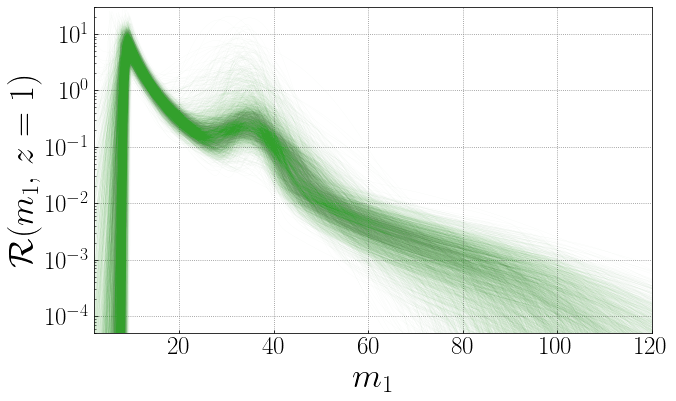

In [43]:
fig,ax = plt.subplots(figsize=(10,6))
m_grid = np.linspace(2,120,500)
z = 1
for i in range(samps_no_gwb.alpha_ref.size):
    p_m = massModel_variation_all_m1(m_grid,samps_no_gwb.alpha_ref.values[i],
                                     samps_no_gwb.mu_m1.values[i], samps_no_gwb.delta_mu.values[i], samps_no_gwb.width_mu.values[i], samps_no_gwb.middle_z_mu.values[i],
                                     samps_no_gwb.sig_m1.values[i],samps_no_gwb.high_sig.values[i], samps_no_gwb.width_sig.values[i], samps_no_gwb.middle_z_sig.values[i],
                                     samps_no_gwb.log_f_peak.values[i],samps_no_gwb.log_high_f_peak.values[i], samps_no_gwb.width_f_peak.values[i], samps_no_gwb.middle_z_f_peak.values[i],
                                     samps_no_gwb.mMax.values[i], samps_no_gwb.mMin.values[i],
                    10.**samps_no_gwb.log_dmMax.values[i],10.**samps_no_gwb.log_dmMin.values[i], np.array([z]))
    p_20 = massModel_variation_all_m1(20,samps_no_gwb.alpha_ref.values[i],
                                     samps_no_gwb.mu_m1.values[i], samps_no_gwb.delta_mu.values[i], samps_no_gwb.width_mu.values[i], samps_no_gwb.middle_z_mu.values[i],
                                     samps_no_gwb.sig_m1.values[i],samps_no_gwb.high_sig.values[i], samps_no_gwb.width_sig.values[i], samps_no_gwb.middle_z_sig.values[i],
                                     samps_no_gwb.log_f_peak.values[i],samps_no_gwb.log_high_f_peak.values[i], samps_no_gwb.width_f_peak.values[i], samps_no_gwb.middle_z_f_peak.values[i],
                                     samps_no_gwb.mMax.values[i], samps_no_gwb.mMin.values[i],
                    10.**samps_no_gwb.log_dmMax.values[i],10.**samps_no_gwb.log_dmMin.values[i], np.array([0.2]))
    p_m *= samps_no_gwb.R20.values[i]/p_20
    ax.plot(m_grid,p_m,color='#33a02c',lw=0.1,alpha=0.1, rasterized = True)

ax.set_yscale('log')
ax.set_ylim(5e-5,30)
ax.set_xlim(2,120)
ax.set_xlabel(r"$m_1$", fontsize=35)
ax.set_ylabel(r"$\mathcal{R}$($m_1$, $z$ = " + f"{z})", fontsize=35)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.savefig("R(m)_Z_02.png", dpi=500, bbox_inches='tight')
plt.show()

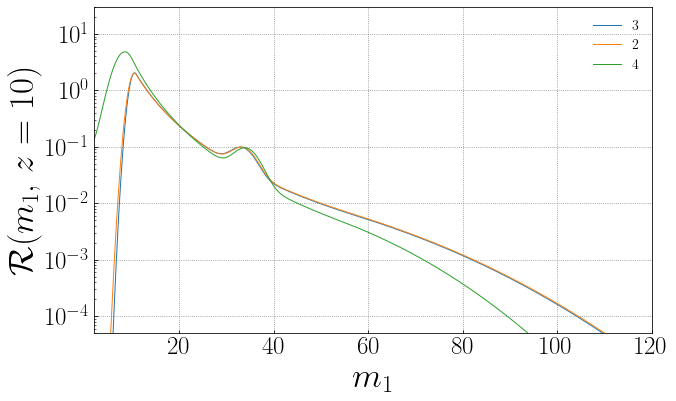

In [44]:
fig,ax = plt.subplots(figsize=(10,6))
m_grid = np.linspace(2,120,500)
z = 10
list_loop = [3, 2, 4]
for i in list_loop:
    p_m = massModel_variation_all_m1(m_grid,samps_no_gwb.alpha_ref.values[i],
                                     samps_no_gwb.mu_m1.values[i], samps_no_gwb.delta_mu.values[i], samps_no_gwb.width_mu.values[i], samps_no_gwb.middle_z_mu.values[i],
                                     samps_no_gwb.sig_m1.values[i],samps_no_gwb.high_sig.values[i], samps_no_gwb.width_sig.values[i], samps_no_gwb.middle_z_sig.values[i],
                                     samps_no_gwb.log_f_peak.values[i],samps_no_gwb.log_high_f_peak.values[i], samps_no_gwb.width_f_peak.values[i], samps_no_gwb.middle_z_f_peak.values[i],
                                     samps_no_gwb.mMax.values[i], samps_no_gwb.mMin.values[i],
                    10.**samps_no_gwb.log_dmMax.values[i],10.**samps_no_gwb.log_dmMin.values[i], np.array([z]))
    p_20 = massModel_variation_all_m1(20,samps_no_gwb.alpha_ref.values[i],
                                     samps_no_gwb.mu_m1.values[i], samps_no_gwb.delta_mu.values[i], samps_no_gwb.width_mu.values[i], samps_no_gwb.middle_z_mu.values[i],
                                     samps_no_gwb.sig_m1.values[i],samps_no_gwb.high_sig.values[i], samps_no_gwb.width_sig.values[i], samps_no_gwb.middle_z_sig.values[i],
                                     samps_no_gwb.log_f_peak.values[i],samps_no_gwb.log_high_f_peak.values[i], samps_no_gwb.width_f_peak.values[i], samps_no_gwb.middle_z_f_peak.values[i],
                                     samps_no_gwb.mMax.values[i], samps_no_gwb.mMin.values[i],
                    10.**samps_no_gwb.log_dmMax.values[i],10.**samps_no_gwb.log_dmMin.values[i], np.array([0.2]))
    p_m *= samps_no_gwb.R20.values[i]/p_20
    ax.plot(m_grid,p_m,lw=1,alpha=1, rasterized = True, label=f"{i}")

ax.set_yscale('log')
ax.set_ylim(5e-5,30)
ax.set_xlim(2,120)
ax.set_xlabel(r"$m_1$", fontsize=35)
ax.set_ylabel(r"$\mathcal{R}$($m_1$, $z$ = " + f"{z})", fontsize=35)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.savefig("R(m)_Z_02.png", dpi=500, bbox_inches='tight')
plt.legend()
plt.show()

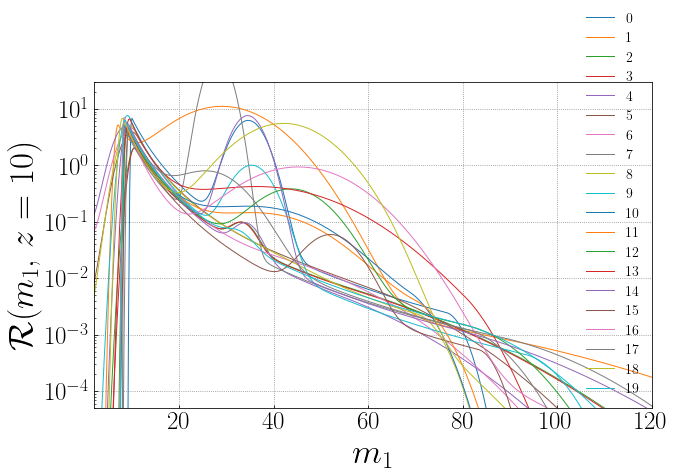

In [45]:
fig,ax = plt.subplots(figsize=(10,6))
m_grid = np.linspace(2,120,500)
z = 10
for i in range(20):
    p_m = massModel_variation_all_m1(m_grid,samps_no_gwb.alpha_ref.values[i],
                                     samps_no_gwb.mu_m1.values[i], samps_no_gwb.delta_mu.values[i], samps_no_gwb.width_mu.values[i], samps_no_gwb.middle_z_mu.values[i],
                                     samps_no_gwb.sig_m1.values[i],samps_no_gwb.high_sig.values[i], samps_no_gwb.width_sig.values[i], samps_no_gwb.middle_z_sig.values[i],
                                     samps_no_gwb.log_f_peak.values[i],samps_no_gwb.log_high_f_peak.values[i], samps_no_gwb.width_f_peak.values[i], samps_no_gwb.middle_z_f_peak.values[i],
                                     samps_no_gwb.mMax.values[i], samps_no_gwb.mMin.values[i],
                    10.**samps_no_gwb.log_dmMax.values[i],10.**samps_no_gwb.log_dmMin.values[i], np.array([z]))
    p_20 = massModel_variation_all_m1(20,samps_no_gwb.alpha_ref.values[i],
                                     samps_no_gwb.mu_m1.values[i], samps_no_gwb.delta_mu.values[i], samps_no_gwb.width_mu.values[i], samps_no_gwb.middle_z_mu.values[i],
                                     samps_no_gwb.sig_m1.values[i],samps_no_gwb.high_sig.values[i], samps_no_gwb.width_sig.values[i], samps_no_gwb.middle_z_sig.values[i],
                                     samps_no_gwb.log_f_peak.values[i],samps_no_gwb.log_high_f_peak.values[i], samps_no_gwb.width_f_peak.values[i], samps_no_gwb.middle_z_f_peak.values[i],
                                     samps_no_gwb.mMax.values[i], samps_no_gwb.mMin.values[i],
                    10.**samps_no_gwb.log_dmMax.values[i],10.**samps_no_gwb.log_dmMin.values[i], np.array([0.2]))
    p_m *= samps_no_gwb.R20.values[i]/p_20
    ax.plot(m_grid,p_m,lw=1,alpha=1, rasterized = True, label=f"{i}")

ax.set_yscale('log')
ax.set_ylim(5e-5,30)
ax.set_xlim(2,120)
ax.set_xlabel(r"$m_1$", fontsize=35)
ax.set_ylabel(r"$\mathcal{R}$($m_1$, $z$ = " + f"{z})", fontsize=35)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.savefig("R(m)_Z_02.png", dpi=500, bbox_inches='tight')
plt.legend()
plt.show()

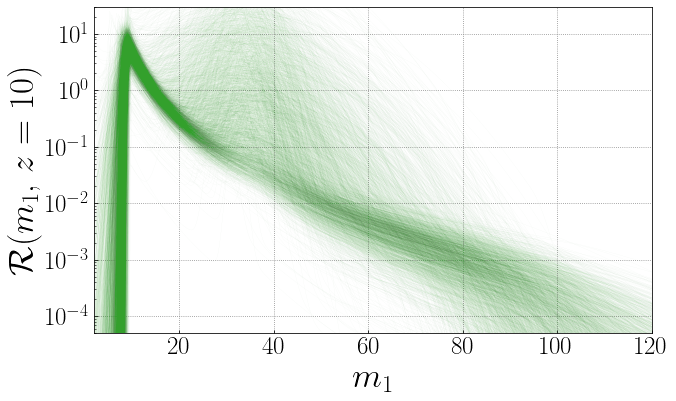

In [46]:
fig,ax = plt.subplots(figsize=(10,6))
m_grid = np.linspace(2,120,500)
z = 10
for i in range(samps_no_gwb.alpha_ref.size):
    p_m = massModel_variation_all_m1(m_grid,samps_no_gwb.alpha_ref.values[i],
                                     samps_no_gwb.mu_m1.values[i], samps_no_gwb.delta_mu.values[i], samps_no_gwb.width_mu.values[i], samps_no_gwb.middle_z_mu.values[i],
                                     samps_no_gwb.sig_m1.values[i],samps_no_gwb.high_sig.values[i], samps_no_gwb.width_sig.values[i], samps_no_gwb.middle_z_sig.values[i],
                                     samps_no_gwb.log_f_peak.values[i],samps_no_gwb.log_high_f_peak.values[i], samps_no_gwb.width_f_peak.values[i], samps_no_gwb.middle_z_f_peak.values[i],
                                     samps_no_gwb.mMax.values[i], samps_no_gwb.mMin.values[i],
                    10.**samps_no_gwb.log_dmMax.values[i],10.**samps_no_gwb.log_dmMin.values[i], np.array([z]))
    p_20 = massModel_variation_all_m1(20,samps_no_gwb.alpha_ref.values[i],
                                     samps_no_gwb.mu_m1.values[i], samps_no_gwb.delta_mu.values[i], samps_no_gwb.width_mu.values[i], samps_no_gwb.middle_z_mu.values[i],
                                     samps_no_gwb.sig_m1.values[i],samps_no_gwb.high_sig.values[i], samps_no_gwb.width_sig.values[i], samps_no_gwb.middle_z_sig.values[i],
                                     samps_no_gwb.log_f_peak.values[i],samps_no_gwb.log_high_f_peak.values[i], samps_no_gwb.width_f_peak.values[i], samps_no_gwb.middle_z_f_peak.values[i],
                                     samps_no_gwb.mMax.values[i], samps_no_gwb.mMin.values[i],
                    10.**samps_no_gwb.log_dmMax.values[i],10.**samps_no_gwb.log_dmMin.values[i], np.array([0.2]))
    p_m *= samps_no_gwb.R20.values[i]/p_20
    ax.plot(m_grid,p_m,color='#33a02c',lw=0.1,alpha=0.1, rasterized = True)

ax.set_yscale('log')
ax.set_ylim(5e-5,30)
ax.set_xlim(2,120)
ax.set_xlabel(r"$m_1$", fontsize=35)
ax.set_ylabel(r"$\mathcal{R}$($m_1$, $z$ = " + f"{z})", fontsize=35)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.savefig("R(m)_Z_02.png", dpi=500, bbox_inches='tight')
plt.show()

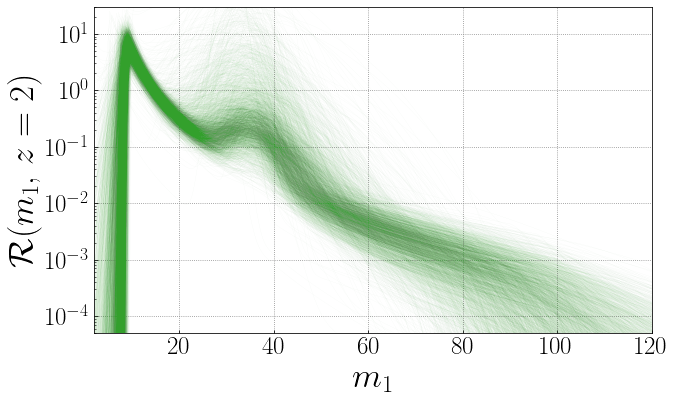

In [47]:
fig,ax = plt.subplots(figsize=(10,6))
m_grid = np.linspace(2,120,500)
z = 2
for i in range(samps_no_gwb.alpha_ref.size):
    p_m = massModel_variation_all_m1(m_grid,samps_no_gwb.alpha_ref.values[i],
                                     samps_no_gwb.mu_m1.values[i], samps_no_gwb.delta_mu.values[i], samps_no_gwb.width_mu.values[i], samps_no_gwb.middle_z_mu.values[i],
                                     samps_no_gwb.sig_m1.values[i],samps_no_gwb.high_sig.values[i], samps_no_gwb.width_sig.values[i], samps_no_gwb.middle_z_sig.values[i],
                                     samps_no_gwb.log_f_peak.values[i],samps_no_gwb.log_high_f_peak.values[i], samps_no_gwb.width_f_peak.values[i], samps_no_gwb.middle_z_f_peak.values[i],
                                     samps_no_gwb.mMax.values[i], samps_no_gwb.mMin.values[i],
                    10.**samps_no_gwb.log_dmMax.values[i],10.**samps_no_gwb.log_dmMin.values[i], np.array([z]))
    p_20 = massModel_variation_all_m1(20,samps_no_gwb.alpha_ref.values[i],
                                     samps_no_gwb.mu_m1.values[i], samps_no_gwb.delta_mu.values[i], samps_no_gwb.width_mu.values[i], samps_no_gwb.middle_z_mu.values[i],
                                     samps_no_gwb.sig_m1.values[i],samps_no_gwb.high_sig.values[i], samps_no_gwb.width_sig.values[i], samps_no_gwb.middle_z_sig.values[i],
                                     samps_no_gwb.log_f_peak.values[i],samps_no_gwb.log_high_f_peak.values[i], samps_no_gwb.width_f_peak.values[i], samps_no_gwb.middle_z_f_peak.values[i],
                                     samps_no_gwb.mMax.values[i], samps_no_gwb.mMin.values[i],
                    10.**samps_no_gwb.log_dmMax.values[i],10.**samps_no_gwb.log_dmMin.values[i], np.array([0.2]))
    p_m *= samps_no_gwb.R20.values[i]/p_20
    ax.plot(m_grid,p_m,color='#33a02c',lw=0.1,alpha=0.1, rasterized = True)

ax.set_yscale('log')
ax.set_ylim(5e-5,30)
ax.set_xlim(2,120)
ax.set_xlabel(r"$m_1$", fontsize=35)
ax.set_ylabel(r"$\mathcal{R}$($m_1$, $z$ = " + f"{z})", fontsize=35)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.savefig("R(m)_Z_02.png", dpi=500, bbox_inches='tight')
plt.show()

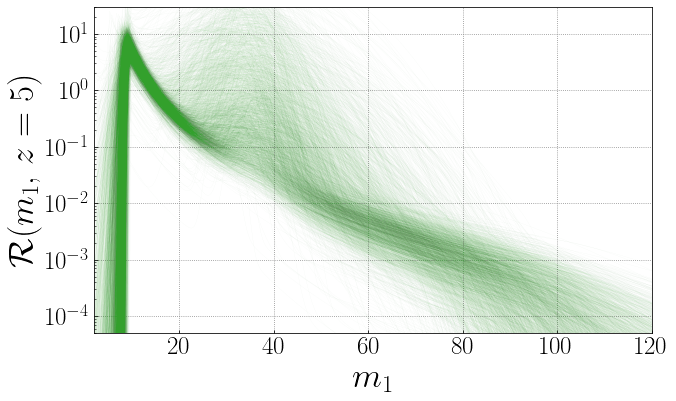

In [48]:
fig,ax = plt.subplots(figsize=(10,6))
m_grid = np.linspace(2,120,500)
z = 5
for i in range(samps_no_gwb.alpha_ref.size):
    p_m = massModel_variation_all_m1(m_grid,samps_no_gwb.alpha_ref.values[i],
                                     samps_no_gwb.mu_m1.values[i], samps_no_gwb.delta_mu.values[i], samps_no_gwb.width_mu.values[i], samps_no_gwb.middle_z_mu.values[i],
                                     samps_no_gwb.sig_m1.values[i],samps_no_gwb.high_sig.values[i], samps_no_gwb.width_sig.values[i], samps_no_gwb.middle_z_sig.values[i],
                                     samps_no_gwb.log_f_peak.values[i],samps_no_gwb.log_high_f_peak.values[i], samps_no_gwb.width_f_peak.values[i], samps_no_gwb.middle_z_f_peak.values[i],
                                     samps_no_gwb.mMax.values[i], samps_no_gwb.mMin.values[i],
                    10.**samps_no_gwb.log_dmMax.values[i],10.**samps_no_gwb.log_dmMin.values[i], np.array([z]))
    p_20 = massModel_variation_all_m1(20,samps_no_gwb.alpha_ref.values[i],
                                     samps_no_gwb.mu_m1.values[i], samps_no_gwb.delta_mu.values[i], samps_no_gwb.width_mu.values[i], samps_no_gwb.middle_z_mu.values[i],
                                     samps_no_gwb.sig_m1.values[i],samps_no_gwb.high_sig.values[i], samps_no_gwb.width_sig.values[i], samps_no_gwb.middle_z_sig.values[i],
                                     samps_no_gwb.log_f_peak.values[i],samps_no_gwb.log_high_f_peak.values[i], samps_no_gwb.width_f_peak.values[i], samps_no_gwb.middle_z_f_peak.values[i],
                                     samps_no_gwb.mMax.values[i], samps_no_gwb.mMin.values[i],
                    10.**samps_no_gwb.log_dmMax.values[i],10.**samps_no_gwb.log_dmMin.values[i], np.array([0.2]))
    p_m *= samps_no_gwb.R20.values[i]/p_20
    ax.plot(m_grid,p_m,color='#33a02c',lw=0.1,alpha=0.1, rasterized = True)

ax.set_yscale('log')
ax.set_ylim(5e-5,30)
ax.set_xlim(2,120)
ax.set_xlabel(r"$m_1$", fontsize=35)
ax.set_ylabel(r"$\mathcal{R}$($m_1$, $z$ = " + f"{z})", fontsize=35)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.savefig("R(m)_Z_02.png", dpi=500, bbox_inches='tight')
plt.show()

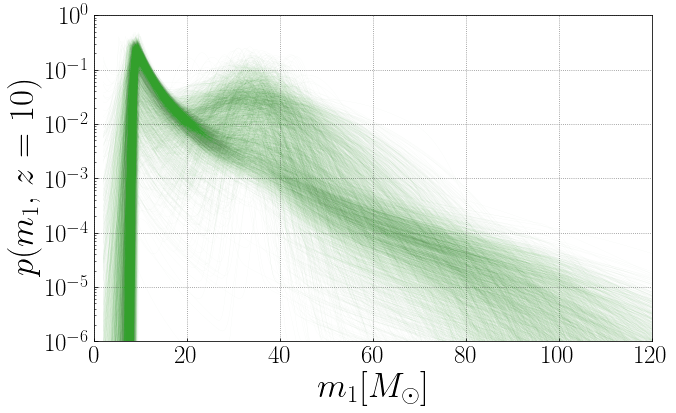

In [54]:
fig,ax = plt.subplots(figsize=(10,6))
m_grid = np.linspace(2,120,500)

z = 10
for i in range(samps_no_gwb.alpha_ref.size):
    p_m = massModel_variation_all_m1(m_grid,samps_no_gwb.alpha_ref.values[i],
                                     samps_no_gwb.mu_m1.values[i], samps_no_gwb.delta_mu.values[i], samps_no_gwb.width_mu.values[i], samps_no_gwb.middle_z_mu.values[i],
                                     samps_no_gwb.sig_m1.values[i],samps_no_gwb.high_sig.values[i], samps_no_gwb.width_sig.values[i], samps_no_gwb.middle_z_sig.values[i],
                                     samps_no_gwb.log_f_peak.values[i],samps_no_gwb.log_high_f_peak.values[i], samps_no_gwb.width_f_peak.values[i], samps_no_gwb.middle_z_f_peak.values[i],
                                     samps_no_gwb.mMax.values[i], samps_no_gwb.mMin.values[i],
                    10.**samps_no_gwb.log_dmMax.values[i],10.**samps_no_gwb.log_dmMin.values[i], np.array([z]))
    p_m /= np.trapz(p_m,m_grid)    
    ax.plot(m_grid,p_m,color='#33a02c',lw=0.1,alpha=0.1, rasterized = True)
    
ax.set_yscale('log')
ax.set_ylim(1e-6,1)
ax.set_xlim(0,120)
ax.set_xlabel(r"$m_1 [M_{\odot}]$", fontsize=35)
ax.set_ylabel(r"$p$($m_1$, $z$ = 10)", fontsize=35)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.show()

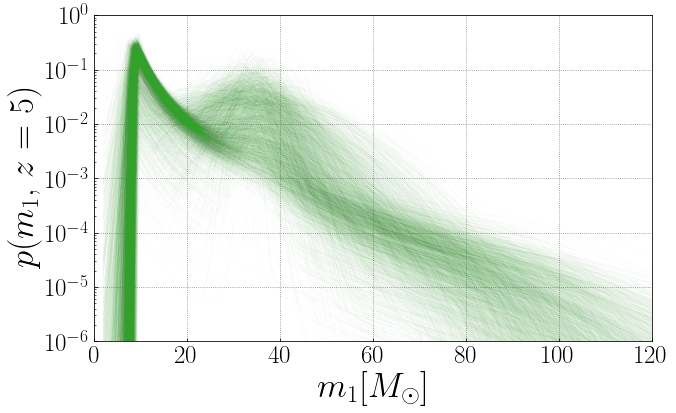

In [55]:
fig,ax = plt.subplots(figsize=(10,6))
m_grid = np.linspace(2,120,500)

z = 5
for i in range(samps_no_gwb.alpha_ref.size):
    p_m = massModel_variation_all_m1(m_grid,samps_no_gwb.alpha_ref.values[i],
                                     samps_no_gwb.mu_m1.values[i], samps_no_gwb.delta_mu.values[i], samps_no_gwb.width_mu.values[i], samps_no_gwb.middle_z_mu.values[i],
                                     samps_no_gwb.sig_m1.values[i],samps_no_gwb.high_sig.values[i], samps_no_gwb.width_sig.values[i], samps_no_gwb.middle_z_sig.values[i],
                                     samps_no_gwb.log_f_peak.values[i],samps_no_gwb.log_high_f_peak.values[i], samps_no_gwb.width_f_peak.values[i], samps_no_gwb.middle_z_f_peak.values[i],
                                     samps_no_gwb.mMax.values[i], samps_no_gwb.mMin.values[i],
                    10.**samps_no_gwb.log_dmMax.values[i],10.**samps_no_gwb.log_dmMin.values[i], np.array([z]))
    p_m /= np.trapz(p_m,m_grid)    
    ax.plot(m_grid,p_m,color='#33a02c',lw=0.1,alpha=0.1, rasterized = True)
    
ax.set_yscale('log')
ax.set_ylim(1e-6,1)
ax.set_xlim(0,120)
ax.set_xlabel(r"$m_1 [M_{\odot}]$", fontsize=35)
ax.set_ylabel(r"$p$($m_1$, $z$ = " + f"{z})", fontsize=35)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.show()

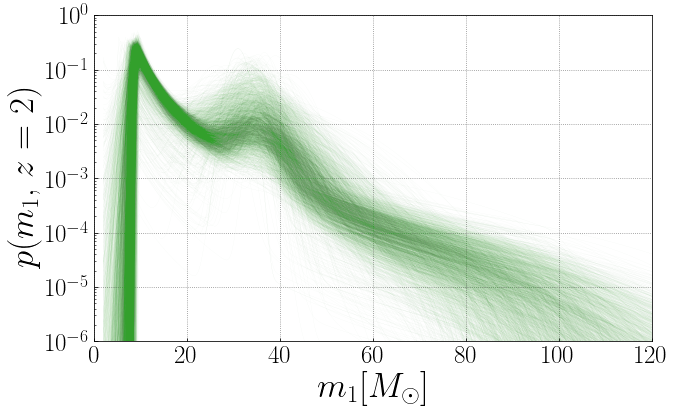

In [56]:
fig,ax = plt.subplots(figsize=(10,6))
m_grid = np.linspace(2,120,500)

z = 2
for i in range(samps_no_gwb.alpha_ref.size):
    p_m = massModel_variation_all_m1(m_grid,samps_no_gwb.alpha_ref.values[i],
                                     samps_no_gwb.mu_m1.values[i], samps_no_gwb.delta_mu.values[i], samps_no_gwb.width_mu.values[i], samps_no_gwb.middle_z_mu.values[i],
                                     samps_no_gwb.sig_m1.values[i],samps_no_gwb.high_sig.values[i], samps_no_gwb.width_sig.values[i], samps_no_gwb.middle_z_sig.values[i],
                                     samps_no_gwb.log_f_peak.values[i],samps_no_gwb.log_high_f_peak.values[i], samps_no_gwb.width_f_peak.values[i], samps_no_gwb.middle_z_f_peak.values[i],
                                     samps_no_gwb.mMax.values[i], samps_no_gwb.mMin.values[i],
                    10.**samps_no_gwb.log_dmMax.values[i],10.**samps_no_gwb.log_dmMin.values[i], np.array([z]))
    p_m /= np.trapz(p_m,m_grid)    
    ax.plot(m_grid,p_m,color='#33a02c',lw=0.1,alpha=0.1, rasterized = True)
    
ax.set_yscale('log')
ax.set_ylim(1e-6,1)
ax.set_xlim(0,120)
ax.set_xlabel(r"$m_1 [M_{\odot}]$", fontsize=35)
ax.set_ylabel(r"$p$($m_1$, $z$ = " + f"{z})", fontsize=35)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.show()

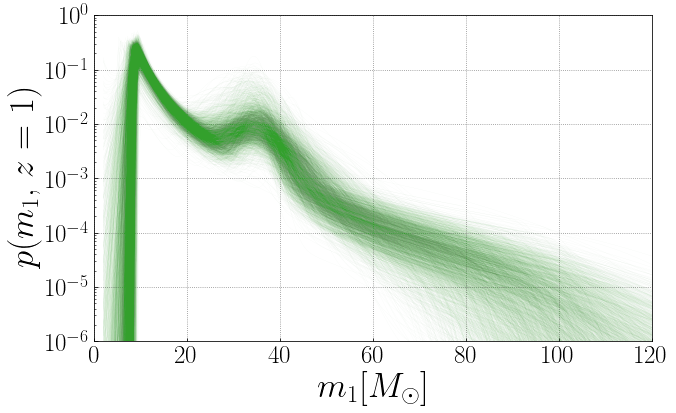

In [57]:
fig,ax = plt.subplots(figsize=(10,6))
m_grid = np.linspace(2,120,500)

z = 1
for i in range(samps_no_gwb.alpha_ref.size):
    p_m = massModel_variation_all_m1(m_grid,samps_no_gwb.alpha_ref.values[i],
                                     samps_no_gwb.mu_m1.values[i], samps_no_gwb.delta_mu.values[i], samps_no_gwb.width_mu.values[i], samps_no_gwb.middle_z_mu.values[i],
                                     samps_no_gwb.sig_m1.values[i],samps_no_gwb.high_sig.values[i], samps_no_gwb.width_sig.values[i], samps_no_gwb.middle_z_sig.values[i],
                                     samps_no_gwb.log_f_peak.values[i],samps_no_gwb.log_high_f_peak.values[i], samps_no_gwb.width_f_peak.values[i], samps_no_gwb.middle_z_f_peak.values[i],
                                     samps_no_gwb.mMax.values[i], samps_no_gwb.mMin.values[i],
                    10.**samps_no_gwb.log_dmMax.values[i],10.**samps_no_gwb.log_dmMin.values[i], np.array([z]))
    p_m /= np.trapz(p_m,m_grid)    
    ax.plot(m_grid,p_m,color='#33a02c',lw=0.1,alpha=0.1, rasterized = True)
    
ax.set_yscale('log')
ax.set_ylim(1e-6,1)
ax.set_xlim(0,120)
ax.set_xlabel(r"$m_1 [M_{\odot}]$", fontsize=35)
ax.set_ylabel(r"$p$($m_1$, $z$ = " + f"{z})", fontsize=35)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.show()

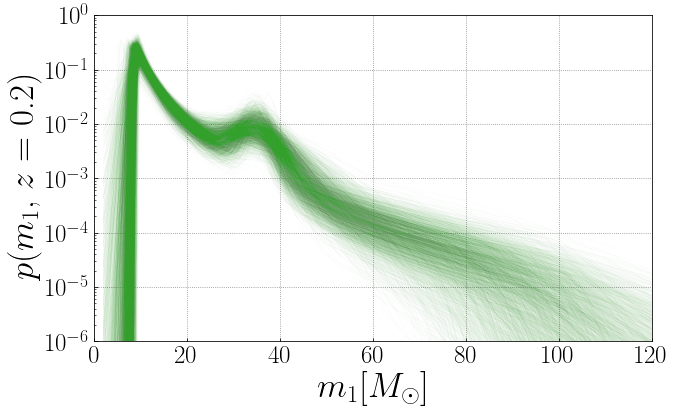

In [58]:
fig,ax = plt.subplots(figsize=(10,6))
m_grid = np.linspace(2,120,500)

z = 0.2
for i in range(samps_no_gwb.alpha_ref.size):
    p_m = massModel_variation_all_m1(m_grid,samps_no_gwb.alpha_ref.values[i],
                                     samps_no_gwb.mu_m1.values[i], samps_no_gwb.delta_mu.values[i], samps_no_gwb.width_mu.values[i], samps_no_gwb.middle_z_mu.values[i],
                                     samps_no_gwb.sig_m1.values[i],samps_no_gwb.high_sig.values[i], samps_no_gwb.width_sig.values[i], samps_no_gwb.middle_z_sig.values[i],
                                     samps_no_gwb.log_f_peak.values[i],samps_no_gwb.log_high_f_peak.values[i], samps_no_gwb.width_f_peak.values[i], samps_no_gwb.middle_z_f_peak.values[i],
                                     samps_no_gwb.mMax.values[i], samps_no_gwb.mMin.values[i],
                    10.**samps_no_gwb.log_dmMax.values[i],10.**samps_no_gwb.log_dmMin.values[i], np.array([z]))
    p_m /= np.trapz(p_m,m_grid)    
    ax.plot(m_grid,p_m,color='#33a02c',lw=0.1,alpha=0.1, rasterized = True)
    
ax.set_yscale('log')
ax.set_ylim(1e-6,1)
ax.set_xlim(0,120)
ax.set_xlabel(r"$m_1 [M_{\odot}]$", fontsize=35)
ax.set_ylabel(r"$p$($m_1$, $z$ = " + f"{z})", fontsize=35)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.show()